<a href="https://colab.research.google.com/github/MustafaGurbuz/ArtificleIntelligence/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("/content/drive/My Drive/YZHomeWork/yaprak_veriseti/train.csv")
test = pd.read_csv("/content/drive/My Drive/YZHomeWork/yaprak_veriseti/test.csv")

label_encoder = LabelEncoder().fit(train.species)
labels = label_encoder.transform(train.species)
classes = list(label_encoder.classes_)

train = train.drop(["id","species"],axis=1)
test = test.drop(["id"],axis=1)
nb_features = 192
nb_classes = len(classes)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(train.values)
train = sc.transform(train.values)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train,labels, test_size=0.1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

X_train = np.array(X_train).reshape(891,192,1)
X_valid = np.array(X_valid).reshape(99,192,1)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Flatten, SimpleRNN, BatchNormalization

model = Sequential()
model.add(SimpleRNN(1024,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(Dropout(0.30))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2018,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(nb_classes,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1024)              1050624   
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2018)              2068450   
_________________________________________________________________
dense_14 (Dense)             (None, 1024)             

In [18]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=1e-3, decay=1e-3, momentum=0.9)

model.compile(loss="categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

score = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
28/28 [==============================] - 68s 2s/step - loss: 4.5852 - accuracy: 0.0168 - val_loss: 4.5818 - val_accuracy: 0.0404
Epoch 2/30
28/28 [==============================] - 61s 2s/step - loss: 4.4901 - accuracy: 0.0527 - val_loss: 4.5662 - val_accuracy: 0.0707
Epoch 3/30
28/28 [==============================] - 54s 2s/step - loss: 4.4252 - accuracy: 0.0898 - val_loss: 4.5445 - val_accuracy: 0.1111
Epoch 4/30
28/28 [==============================] - 51s 2s/step - loss: 4.3746 - accuracy: 0.1033 - val_loss: 4.5179 - val_accuracy: 0.1515
Epoch 5/30
28/28 [==============================] - 52s 2s/step - loss: 4.3166 - accuracy: 0.1279 - val_loss: 4.4843 - val_accuracy: 0.1616
Epoch 6/30
28/28 [==============================] - 52s 2s/step - loss: 4.2502 - accuracy: 0.1706 - val_loss: 4.4390 - val_accuracy: 0.2222
Epoch 7/30
28/28 [==============================] - 62s 2s/step - loss: 4.1937 - accuracy: 0.1706 - val_loss: 4.3897 - val_accuracy: 0.2525
Epoch 8/30
28/28 [==

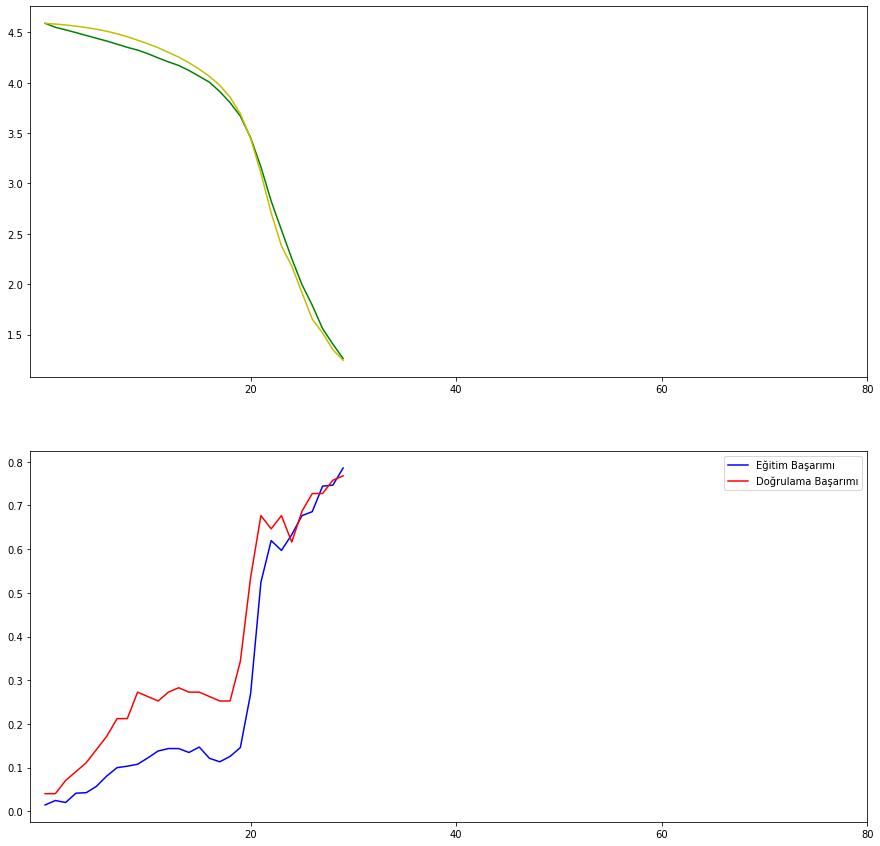

In [16]:
import matplotlib.pyplot as pt

fig, (ax1, ax2) = pt.subplots(2, 1, figsize=(15, 15))
ax1.plot(model.history.history['loss'], color='g', label="Eğitim Kaybı")
ax1.plot(model.history.history['val_loss'], color='y', label="Doğrulama Kaybı")
ax1.set_xticks(np.arange(20,100,20))
ax2.plot(model.history.history['accuracy'], color='b', label="Eğitim Başarımı")
ax2.plot(model.history.history['val_accuracy'], color='r', label="Doğrulama Başarımı")
ax2.set_xticks(np.arange(20,100,20))
pt.legend()
pt.show()